In [3]:
import os
import glob

In [4]:
# Count the number of files in each directory and perform a summary in a table

def count_files_illness(parent_dir, illness, mode_to_count='all'):
    
    assert illness in ['altpig', 'dmae', 'excavation', 'membrana', 'nevus']
    assert mode_to_count in ['train', 'test', 'validation', 'all'], 'mode_to_count parameter not recognized'
    
    count = 0
    illness_dir = 'u_{}_symbolic_512'.format(illness)    

    if mode_to_count != 'all':
        filenames_dir = os.path.join(parent_dir, illness_dir, mode_to_count, illness)
        count = len([f for f in os.listdir(filenames_dir) if f.endswith('jpg')])
        
    else:
        for mode in ['test', 'train', 'validation']:
            filenames_dir = os.path.join(parent_dir, illness_dir, mode, illness)
            count += len([f for f in os.listdir(filenames_dir) if f.endswith('jpg')])
    
    return count


def count_files_healthy(parent_dir, mode_to_count='all'):

    assert mode_to_count in ['train', 'test', 'validation', 'all'], 'mode_to_count parameter not recognized'
    
    pathologies = ['altpig', 'dmae', 'excavation', 'membrana', 'nevus']
    count = 0
    
    for pathology in pathologies:        
        pathology_dir = 'u_{}_symbolic_512'.format(pathology)

        if mode_to_count != 'all':
            dir_to_search = os.path.join(parent_dir, pathology_dir, mode_to_count) + '/normal/*' # We only want the 'normal' images in this function
            count = len([f for f in glob.glob(dir_to_search) if f.endswith('.jpg')])

        else:
            for mode in ['train', 'test', 'validation']:
                dir_to_search = os.path.join(parent_dir, pathology_dir, mode) + '/normal/*' # We only want the 'normal' images in this function
                count += len([f for f in glob.glob(dir_to_search) if f.endswith('.jpg')])
    
    return count

In [5]:
pathologies = ['altpig', 'dmae', 'excavation', 'membrana', 'nevus']
for pathology in pathologies:
    c = count_files_illness(parent_dir='data/retina_data_subset/', illness=pathology)
    print('Number of images with {}: {}'.format(pathology, c))

c = count_files_healthy(parent_dir='data/retina_data_subset/')
print('Number of images with no pathology detected: {}'.format(c))

Number of images with altpig: 134
Number of images with dmae: 1436
Number of images with excavation: 303
Number of images with membrana: 313
Number of images with nevus: 264
Number of images with no pathology detected: 3339


In [8]:
train = [1033, 3844, 1464, 951, 1084, 8376]
test = [323, 1202, 458, 298, 339, 2620]
validation = [259, 961, 367, 238, 272, 2097]
total = [1615, 6007, 2289, 1487, 1695, 13093]
labels = ['altpig', 'dmae', 'excavation', 'membrana', 'nevus', 'normal']

import matplotlib.pyplot as plt


<BarContainer object of 6 artists>

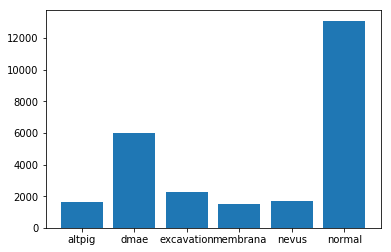

In [9]:
plt.bar(labels, total)